# 3 Ewaluacja, regularyzacja, optymalizacja

## 3.2 Problem nadmiernego dopasowania, regularyzacja

Plik data6.tsv zawiera pewne dane. Zastosuj do nich regresję wielomianową:

- pierwszego stopnia (funkcja liniowa)
- drugiego stopnia (funkcja kwadratowa)
- piątego stopnia (wielomian 5. stopnia)

Czy w którymś z powyższych przypadków występuje zjawisko nadmiernego dopasowania?

Do tych samych danych zastosuj regresję liniową 5. stopnia (wielomian 5. stopnia), ale z regularyzacją.

Czy problem nadmiernego dopasowania nadal występuje?

## Import Libraries and Dataset

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Regularization
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


# IMPORT DATASET
df = pd.read_csv('data6.tsv',sep = '\t', header=None)
df = df.rename(columns={0 : 'X',
                        1 : 'y'})
df.sample(5)

,X,y
8,12.390,-358.240
4,121.444,1840.589
19,12.424,490.714
14,179.476,3313.424
2,118.162,2274.989


## Testowanie poziomu dopasowania regresji do danych

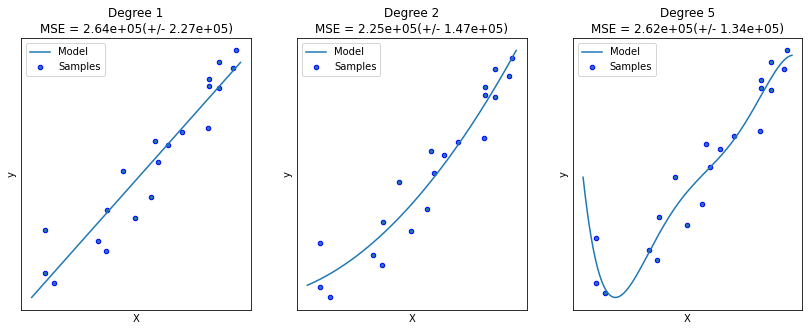

In [4]:
X = df['X']
y = df['y']


degrees = [1, 2, 5]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                            include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 200, 400)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Czy w którymś z powyższych przypadków występuje zjawisko nadmiernego dopasowania?

Tak, problem ten występuje dla regresji wielomianowej 5-stopnia co obrazuje trzeci wykres. 

## Regresja liniowa 5-stopnia z regularyzacją

### Ridge Regression (also called Tikhonov regularization)

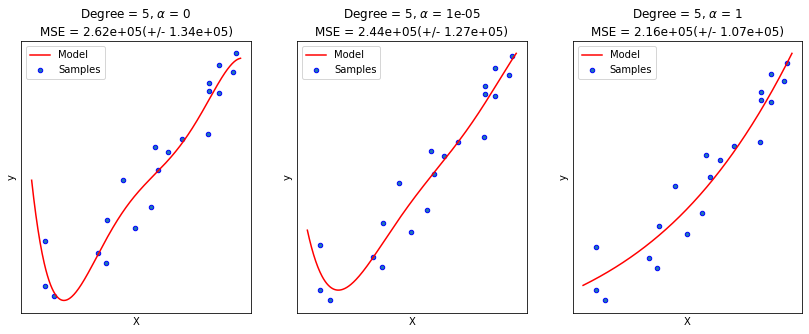

In [5]:
degree = 5
alphas = [0, 10**-5, 1]
plt.figure(figsize=(14, 5))


for i, alpha in enumerate(alphas):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degree,
                                            include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("std_scaler", StandardScaler()),
                         ("regul_reg", Ridge(alpha))])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 200, 400)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color = "red")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree = 5, $\\alpha$ = {}\nMSE = {:.2e}(+/- {:.2e})".format(
        alphas[i], -scores.mean(), scores.std()))
plt.show()

Czy problem nadmiernego dopasowania nadal występuje?

Przy odpowiednio dobranym parametrze $\alpha$ problem nadmiernego dopasowanianie występuje.